<a href="https://colab.research.google.com/github/oromiaGodanna/NLP_2022_VU/blob/main/Copy_of_NLP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from collections import Counter
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv ('/content/drive/My Drive/olid-train.csv')
test_df = pd.read_csv ('/content/drive/My Drive/olid-test.csv')


#Part A: Fine-tune BERT for offensive language detection (7 points)



##1.

In [ ]:
## 1.

print(train_df['labels'].value_counts())
print(train_df['labels'].value_counts(normalize = True))
sample_df = train_df.groupby('labels').apply(lambda x: x.sample(n=1)).reset_index(drop = True)
print(sample_df)


0    8840
1    4400
Name: labels, dtype: int64
0    0.667674
1    0.332326
Name: labels, dtype: float64
      id                                               text  labels
0  24531                           @USER Happy Birthday(s)!       0
1  67265  @USER @USER And this isn’t considered hate spe...       1


##2

In [ ]:
##2. 


def randomBaseline(data):
    seed(17)
    classes = list(set(data['labels']))
    prediction = [classes[randrange(len(classes))] for i in range(data.shape[0])]
    data['prediction'] = prediction
    return data

def majorityBaseline(data):
    majority_class = Counter(data['labels']).most_common(1)[0]
    majority_class = majority_class[0]
    print(majority_class)
    prediction = [majority_class for i in range(data.shape[0])]
    data['prediction'] = prediction
    return data


def divide(num, den):
    return round((num / den), 2) if den else 0


def contengincy_matr(data, prediction='prediction', labels='labels'):
  plt.clf()
  contingency_matrix = pd.crosstab(data['prediction'], data['labels'])
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_aspect(1)
  res = sn.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu")
  plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)

  plt.show()

In [ ]:
def calculateResults(data, class_label):

    postivePredictions = data[data['prediction'] == class_label]
    #TP
    truePost = postivePredictions[postivePredictions['labels'] == postivePredictions['prediction']]

    #FP
    falsePostive = postivePredictions[postivePredictions['labels'] != postivePredictions['prediction']]

    #FN
    negativePredictions = data[data['prediction'] != class_label]
    falseNegative = negativePredictions[negativePredictions['labels'] == class_label]

    precision = divide(len(truePost), (len(truePost) + len(falsePostive)))
    recall = divide(len(truePost), (len(truePost) + len(falseNegative)))
    f1 = 2 * divide((precision * recall), (precision + recall))

    macro_avg_precision = round(precision_score(data['labels'], data['prediction'], average='macro'), 2)
    weighted_avg_precision = round(precision_score(data['labels'], data['prediction'], average='weighted'), 2)

    macro_avg_recall = round(recall_score(data['labels'], data['prediction'], average='macro'), 2)
    weighted_avg_recall = round(recall_score(data['labels'], data['prediction'], average='weighted'), 2)

    macro_avg_f1 = round(f1_score(data['labels'], data['prediction'], average='macro'), 3)
    weighted_avg_f1 = round(f1_score(data['labels'], data['prediction'], average='weighted'), 3)

    return {'precision': precision, 'recall': recall, 'f1': f1, 'macro_avg':{'precision':macro_avg_precision, 'recall': macro_avg_recall,  'f1': macro_avg_f1}, 'weighted_avg': {'precision':weighted_avg_precision, 'recall': weighted_avg_recall,  'f1': weighted_avg_f1}}


In [ ]:

##Random Baseline
rand_df = randomBaseline(test_df)
print('Random baseline')
print('calss -> 0', calculateResults(rand_df, 0))
print('class -> 1: ', calculateResults(rand_df, 1))

##Random Baseline
maj_df = majorityBaseline(test_df)
print('Majority baseline \n calss = 0')
print(calculateResults(maj_df, 0))
print('class = 1')
print(calculateResults(maj_df, 1))

Random baseline
calss -> 0 {'precision': 0.72, 'recall': 0.49, 'f1': 0.58, 'macro_avg': {'precision': 0.5, 'recall': 0.49, 'f1': 0.468}, 'weighted_avg': {'precision': 0.59, 'recall': 0.49, 'f1': 0.519}}
class -> 1:  {'precision': 0.27, 'recall': 0.5, 'f1': 0.36, 'macro_avg': {'precision': 0.5, 'recall': 0.49, 'f1': 0.468}, 'weighted_avg': {'precision': 0.59, 'recall': 0.49, 'f1': 0.519}}
0
Majority baseline 
 calss = 0
{'precision': 0.72, 'recall': 1.0, 'f1': 0.84, 'macro_avg': {'precision': 0.36, 'recall': 0.5, 'f1': 0.419}, 'weighted_avg': {'precision': 0.52, 'recall': 0.72, 'f1': 0.604}}
class = 1
{'precision': 0, 'recall': 0.0, 'f1': 0, 'macro_avg': {'precision': 0.36, 'recall': 0.5, 'f1': 0.419}, 'weighted_avg': {'precision': 0.52, 'recall': 0.72, 'f1': 0.604}}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

##3

In [ ]:
#3
!pip install simpletransformers 

Transformer model created with one epoch, *and* maximum token length same as default which is 128


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

#Model configuration 
model_args = ClassificationArgs()
model_args.num_train_epochs = 1
model_args.labels_list = [1, 0]
model_args.overwrite_output_dir = True 
model_args.output_dir = f"/content/drive/MyDrive/Colab Notebooks/outputs/"
model_args.best_model_dir = f"/content/drive/MyDrive/Colab Notebooks/best_model_outputs/"

#the classification model
model = ClassificationModel("bert", "bert-base-cased", args=model_args)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Split the training data into 80/20 for training/validation set

In [ ]:
# Train the model
train_df_new, eval_df = np.split(train_df, [int(.8*len(train_df))])
model.train_model(train_df_new.iloc[: , 1:], )

# # Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df.iloc[: , 1:])

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/10592 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_2_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1324 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to /content/drive/MyDrive/Colab Notebooks/outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/2648 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_2_2


Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.5397060553528055, 'tp': 1490, 'tn': 615, 'fp': 262, 'fn': 281, 'auroc': 0.8507958255615784, 'auprc': 0.9129286802110159, 'eval_loss': 0.5092377878748038}


In [ ]:
#make predictions
predictions, raw_output = model.predict(test_df['text'].tolist())

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
test_df['prediction'] = predictions

In [ ]:
#write predictions to a csv
test_df.to_csv('/content/drive/My Drive/test_with_predictions.csv', index=False)

Make confusion matrix for the output

{'precision': 0.89, 'recall': 0.89, 'f1': 0.9, 'macro_avg': {'precision': 0.8, 'recall': 0.8, 'f1': 0.801}, 'weighted_avg': {'precision': 0.84, 'recall': 0.84, 'f1': 0.84}}
{'precision': 0.72, 'recall': 0.71, 'f1': 0.72, 'macro_avg': {'precision': 0.8, 'recall': 0.8, 'f1': 0.801}, 'weighted_avg': {'precision': 0.84, 'recall': 0.84, 'f1': 0.84}}


<Figure size 432x288 with 0 Axes>

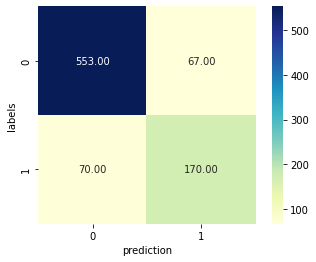

In [ ]:
##
print(calculateResults(test_df, 0))
print(calculateResults(test_df, 1))

contengincy_matr(test_df)

##4

##This takes some time to run

In [ ]:
##4. This takes so much time so the data is once saved in a csv file no need to re-run
column_names = ["token", "subwords", "num_of_subwords"]
df = pd.DataFrame(columns = column_names)
for text in train_df['text'].tolist():
  entry = {}
  for word in text.split(' '):
    entry['token'] = word
    subwords = model.tokenizer.tokenize(word)
    entry['subwords'] = subwords
    entry['num_of_subwords'] = len(subwords)
    df = df.append(entry, ignore_index=True)

print(df.head(50))

            token                subwords num_of_subwords
0           @USER           [@, US, ##ER]               3
1             She                   [She]               1
2          should                [should]               1
3             ask                   [ask]               1
4               a                     [a]               1
5             few                   [few]               1
6          native                [native]               1
7       Americans             [Americans]               1
8            what                  [what]               1
9           their                 [their]               1
10           take                  [take]               1
11             on                    [on]               1
12           this                  [this]               1
13            is.                 [is, .]               2
14          @USER           [@, US, ##ER]               3
15          @USER           [@, US, ##ER]               3
16            

In [ ]:
df.to_csv('/content/drive/My Drive/training_set_tokenization.csv', index=False)

In [ ]:
trainig_tokenization = pd.read_csv ('/content/drive/My Drive/training_set_tokenization.csv')
trainig_tokenization

,token,subwords,num_of_subwords
0,@USER,"['@', 'US', '##ER']",3
1,She,['She'],1
2,should,['should'],1
3,ask,['ask'],1
4,a,['a'],1
...,...,...,...
300831,#cddr,"['#', 'c', '##dd', '##r']",4
300832,#shameonSpain,"['#', 'shame', '##on', '##S', '##pa', '##in']",6
300833,#WakeupEurope,"['#', 'Wake', '##up', '##E', '##uro', '##pe']",6
300834,@USER,"['@', 'US', '##ER']",3


In [ ]:
print('number of tokens: ', len(trainig_tokenization))
print('Number of tokens that has been split into more than one subword :', len(trainig_tokenization[trainig_tokenization['num_of_subwords'] > 1]))
print('Average number of subwords per token:', round(trainig_tokenization['num_of_subwords'].mean(), 2))
# print('Length of longest Subword:', trainig_tokenization['num_of_subwords'].max())
# longest_subword = trainig_tokenization[trainig_tokenization['num_of_subwords'] == (trainig_tokenization['num_of_subwords'].max())]
# print('Longest Subword:')
# print(longest_subword['subwords'])

number of tokens:  300836
Number of tokens that has been split into more than one subword : 95279
Average number of subwords per token: 1.59
Length of longest Subword: 39
Longest Subwords:
68992    ['Bet', '##o', '-', 'I', '’', 'm', '##100', '%...
Name: subwords, dtype: object


In [ ]:
# Length of longest subword in the vocabulary 
bert_vocab = model.tokenizer.vocab
words = list(bert_vocab.keys())
word_len = [len(x) for x in words]
example = words[word_len.index(max(word_len))]
print('Longest Subword:', example, '\nMaximum subword length',  max(word_len))

Longest Subword: Telecommunications 
Maximum subword length 18


#Part B: Error analysis with checklist (13 points)

In [ ]:
!pip install checklist

##5

In [ ]:
##5
import checklist
from checklist.perturb import Perturb


diag_test = pd.read_csv ('/content/drive/My Drive/olid-subset-diagnostic-tests.csv')

diag_test_pertub = diag_test

In [ ]:
print(diag_test['text'])

0         @USER @USER Who the hell does he think he is?
1     #BREAKING. #Greece: Molotov cocktails fly afte...
2     #OrrinHatch I can’t believe this sexist , clue...
3     @USER @USER I'll use that one the next time im...
4       0-1 lost my acca on the first fucking fight cba
                            ...                        
95    @USER He is obviously getting suspended. He is...
96    #Canada - EXCLUSIVE: #Trudeau #Liberals leave ...
97    @USER @USER ...than why did you show us how ho...
98    @USER @USER @USER You have yet to answer what ...
99    #MAGA  ... got any ideas how she could have do...
Name: text, Length: 100, dtype: object


In [ ]:
##model prediction on the original dataset predictions
predictions_orig, raw_output_orig = model.predict(diag_test['text'].tolist())
print(predictions_orig)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
diag_test['prediction'] = predictions_orig

<Figure size 432x288 with 0 Axes>

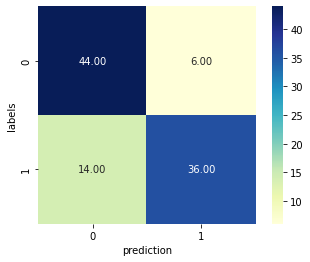

In [ ]:
contengincy_matr(diag_test)

In [ ]:
print(calculateResults(diag_test, 1))

{'precision': 0.86, 'recall': 0.72, 'f1': 0.78, 'macro_avg': {'precision': 0.81, 'recall': 0.8, 'f1': 0.799}, 'weighted_avg': {'precision': 0.81, 'recall': 0.8, 'f1': 0.799}}


In [ ]:
Pertubing with 3 typos made zero difference compared to the original data so number of typos per text/tweet had to be increased to 7 to see some changes

In [ ]:
np.random.seed(42)
diag_test_pertub['text']  = diag_test_pertub.apply(lambda row : Perturb.add_typos(row['text'], typos=7), axis = 1)
print(diag_test_pertub['text'])
##pertured dataset predictions
predictions_pertub, raw_output_pertub = model.predict(diag_test_pertub['text'].tolist())
print(predictions_pertub)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


0         @USER @SUER Wh othe ehll doe she think he si?
1     #BREAKING. #Greece: Molotov cocktails fly afte...
2     #OrrinHatch I can’t bleieve this sexist , clue...
3     @USER @USER I'll use that one the next time im...
4       0- 1lotsm y acca on hte first fuckin gifghtc ba
                            ...                        
95    @USE RHe i sobviosuly gettings upsended. He is...
96    #Canada - EXCLUSIVE: #Trueadu #Liberals leave ...
97    U@SER @USER ...than why did you hows us ohw ho...
98    @UESR@ USER @USER You have yet to answer what ...
99    #MAGA  ... got any idesa how she could have do...
Name: text, Length: 100, dtype: object


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
diag_test_pertub['prediction'] = predictions_pertub

<Figure size 432x288 with 0 Axes>

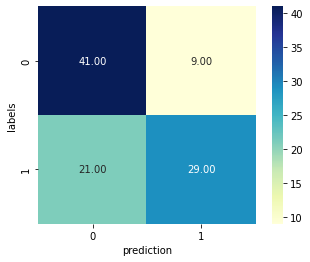

In [ ]:
contengincy_matr(diag_test_pertub)

In [ ]:
print(calculateResults(diag_test_pertub, 1))

{'precision': 0.76, 'recall': 0.58, 'f1': 0.66, 'macro_avg': {'precision': 0.71, 'recall': 0.7, 'f1': 0.696}, 'weighted_avg': {'precision': 0.71, 'recall': 0.7, 'f1': 0.696}}


In [ ]:
 print(diag_test_pertub[diag_test_pertub['prediction'] != diag_test_pertub['labels']])
 lst = diag_test_pertub[diag_test_pertub['prediction'] != diag_test_pertub['labels']]['text'].tolist()
 print(lst)

       id                                               text  labels  \
0   89200      @USER @SUER Wh othe ehll doe she think he si?       1   
1   71294  #BREAKING. #Greece: Molotov cocktails fly afte...       1   
6   60466  #Christian #America – If we go by #Trump’s exa...       1   
8   16333  #eDomcrats #Liberals you are being #threatened...       1   
10  76379  #LiberalHypocrisy #crimnial #democrat #veidenc...       1   
11  21826                c(r1tiak lvoic)e smef may ssc heeks       1   
12  15998                             g*ets all eth bictehs*       1   
17  92215  #Emmys  eWll,mo st of thos eex-crackheadsa re ...       1   
22  79934  U@ESR 'cause everyone know sa real leader fall...       1   
23  55048  #BoycottNike campaign must continue and grow  ...       1   
24  98916  #ANTIFA are bedfellows with The Democratic Soc...       1   
26  32190   @USER Antifa hasT S leevl ifnlunece.I t's scary.       1   
31  78688  #ConfirmKavanugh nw,o stall tactics are DC cro...    

## 6
 Negation

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
diag_test = pd.read_csv ('/content/drive/My Drive/olid-subset-diagnostic-tests.csv')


In [ ]:
diag_test_negation = diag_test

pdata = list(nlp.pipe(diag_test_negation['text'].tolist()))
ret = Perturb.perturb(pdata, Perturb.add_negation)
ret.data


[['@USER @USER Who the hell does he think he is?',
  "@USER @USER Who the hell doesn't he think he is?"],
 ['#BREAKING. #Greece: Molotov cocktails fly after protest honouring killed antifa arti... URL via @USER URL',
  "#BREAKING. #Greece: Molotov cocktails don't fly after protest honouring killed antifa arti... URL via @USER URL"],
 ['#OrrinHatch I can’t believe this sexist , clueless, old fart gets to weigh in on another woman’s charges against a Supreme Court nominee. And he is spouting the same old nasty shit he spewed 20+ years ago against Anita Hill. His time’s up! Good riddance Neanderthal!',
  '#OrrinHatch I can’t believe this sexist , clueless, old fart gets to weigh in on another woman’s charges against a Supreme Court nominee. And he is not spouting the same old nasty shit he spewed 20+ years ago against Anita Hill. His time’s up! Good riddance Neanderthal!'],
 ["@USER @USER I'll use that one the next time im in a gun control debate or in a debate about free speech or taxes.

In [ ]:
print(diag_test_negation.head(10))

      id                                               text  labels
0  89200      @USER @USER Who the hell does he think he is?       1
1  71294  #BREAKING. #Greece: Molotov cocktails fly afte...       1
2  55633  #OrrinHatch I can’t believe this sexist , clue...       1
3  16856  @USER @USER I'll use that one the next time im...       1
4  26072    0-1 lost my acca on the first fucking fight cba       1
5  22067  #Bakersfield is why we need gun control! Sorry...       1
6  60466  #Christian #America – If we go by #Trump’s exa...       1
7  25685  @USER @USER @USER She is the most disingenuous...       1
8  16333  #Democrats #Liberals you are being #threatened...       1
9  78417  699. Just wanted to tell you you should Hang O...       1


In [ ]:
diag_test_negation['negation'] = ''

for x in ret.data:
  diag_test_negation.loc[diag_test_negation['text'] == x[0], 'negation'] = x[1]


In [ ]:
print(diag_test_negation.head(60))

       id                                               text  labels  \
0   89200      @USER @USER Who the hell does he think he is?       1   
1   71294  #BREAKING. #Greece: Molotov cocktails fly afte...       1   
2   55633  #OrrinHatch I can’t believe this sexist , clue...       1   
3   16856  @USER @USER I'll use that one the next time im...       1   
4   26072    0-1 lost my acca on the first fucking fight cba       1   
5   22067  #Bakersfield is why we need gun control! Sorry...       1   
6   60466  #Christian #America – If we go by #Trump’s exa...       1   
7   25685  @USER @USER @USER She is the most disingenuous...       1   
8   16333  #Democrats #Liberals you are being #threatened...       1   
9   78417  699. Just wanted to tell you you should Hang O...       1   
10  76379  #LiberalHypocrisy #criminal #democrat #evidenc...       1   
11  21826                (cr1tikal voice) smef my ass cheeks       1   
12  15998                             *gets all the bitches*    

In [ ]:
##negated dataset predictions
predictions_negation, raw_output_negation = model.predict(diag_test_negation['negation'].tolist())
print(predictions_negation)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Assigning expected labels as the reverse of the original labels doesn't look right therefore these expected labels generated here are not used for the report.

In [ ]:
diag_test_negation['prediction'] = predictions_negation
diag_test_negation['expected_label'] = [1 if x == 0 else 0 for x in diag_test_negation['labels'].tolist()]
##

In [ ]:
diag_test_negation.to_csv('/content/drive/My Drive/diag_test_negation_with_prediction.csv', index=False)

In [ ]:
print(diag_test_negation.head(10))

      id                                               text  labels  \
0  89200      @USER @USER Who the hell does he think he is?       1   
1  71294  #BREAKING. #Greece: Molotov cocktails fly afte...       1   
2  55633  #OrrinHatch I can’t believe this sexist , clue...       1   
3  16856  @USER @USER I'll use that one the next time im...       1   
4  26072    0-1 lost my acca on the first fucking fight cba       1   
5  22067  #Bakersfield is why we need gun control! Sorry...       1   
6  60466  #Christian #America – If we go by #Trump’s exa...       1   
7  25685  @USER @USER @USER She is the most disingenuous...       1   
8  16333  #Democrats #Liberals you are being #threatened...       1   
9  78417  699. Just wanted to tell you you should Hang O...       1   

                                            negation  prediction  \
0   @USER @USER Who the hell doesn't he think he is?           1   
1  #BREAKING. #Greece: Molotov cocktails don't fl...           0   
2  #OrrinHatch

<Figure size 432x288 with 0 Axes>

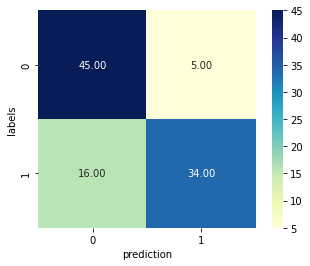

In [ ]:
contengincy_matr(diag_test_negation, labels="expected_label")

##7
 Creating examples from scratch with checklist  (2.5 points)

In [ ]:
from checklist.editor import Editor
editor = Editor()


In [ ]:
# using template ‘I hate {mask}’, ‘I don’t hate {mask}’

ret_hate = editor.template('I hate {mask}.')
ret_not_hate = editor.template('I don\'t hate {mask}.')


Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/checklist/text_generation.py:171: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  to_pred = torch.tensor(to_pred, device=self.device).to(torch.int64)


In [ ]:
df_mask = pd.DataFrame(columns=['text', 'labels'])

# ‘I hate {nationality}’, ‘I don’t hate {nationality}’
ret_nationality_off = editor.template('I hate {nationality}.', remove_duplicates=True)
ret_nationality = editor.template('I don’t hate {nationality}.', remove_duplicates=True)


# ‘I hate {religion}’, ‘I don’t hate {religion}’

ret_religion_off = editor.template('I hate {religion}.', remove_duplicates=True)
ret_religion = editor.template('I don’t hate {religion}.', remove_duplicates=True)

##Create a dataset with 120 entries 
df_mask['text'] = list(np.random.choice(ret_hate.data, 20))+ list(np.random.choice(ret_nationality_off.data, 20)) + list(np.random.choice(ret_religion_off.data, 20)) + list(np.random.choice(ret_not_hate.data, 20)) +list(np.random.choice(ret_nationality.data, 20))+list(np.random.choice(ret_religion.data, 20))
df_mask['labels'] = [y for x in [np.ones((60,), dtype=int), np.zeros((60,), dtype=int)] for y in x]


In [ ]:
##Generated dataset predictions
predictions_mask, raw_output_mask = model.predict(df_mask['text'].tolist())
df_mask['prediction'] = predictions_mask

print(predictions_mask_)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 432x288 with 0 Axes>

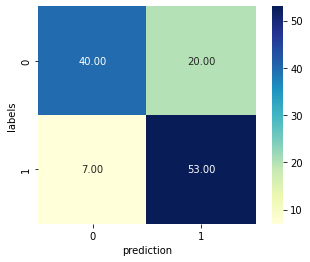

                             text  labels  prediction
80       I don’t hate Lithuanian.       0           0
34              I hate Uruguayan.       1           1
35                I hate Zambian.       1           1
83          I don’t hate Mexican.       0           1
64             I don't hate ISIS.       0           0
100    I don’t hate Christianity.       0           0
62              I don't hate God.       0           1
38               I hate Gabonese.       1           1
114     I don’t hate Agnosticism.       0           0
4                I hate children.       1           1
85       I don’t hate Macedonian.       0           0
1                  I hate robots.       1           1
119  I don’t hate Zoroastrianism.       0           0
51                 I hate Baha'i.       1           1
99       I don’t hate Indonesian.       0           0
31          I hate South African.       1           1
58            I hate Agnosticism.       1           1
110            I don’t hate 

In [ ]:
contengincy_matr(df_mask) #49/21 >> 30/44
print(df_mask.sample(20))